## Import Libraries

In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## Function 

In [ ]:
import pandas as pd

def IHateThisProject(file_path):
    columns = [
        'ID', 'Diagnosis', 
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ]
    
    df = pd.read_csv(file_path, header=None, names=columns)
    df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
    df.drop(columns=["ID"], inplace=True)
    return df

In [ ]:
def IHateThisProject1(file_path):
    columns = [
        'ID', 'Diagnosis', 
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ]
    
    df = pd.read_csv(file_path, header=None, names=columns)
    return df

In [23]:
df= IHateThisProject("D:\\ML2\\wdbc.csv")
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
df.shape

(569, 31)

In [25]:
df.info

<bound method DataFrame.info of      Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840    

## Check Null value

In [26]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Check Data Types to each column

In [27]:
print("\nData types:\n", df.dtypes)


Data types:
 Diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concav

In [28]:
df.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Get the Distribution to each Feature to know which act normal

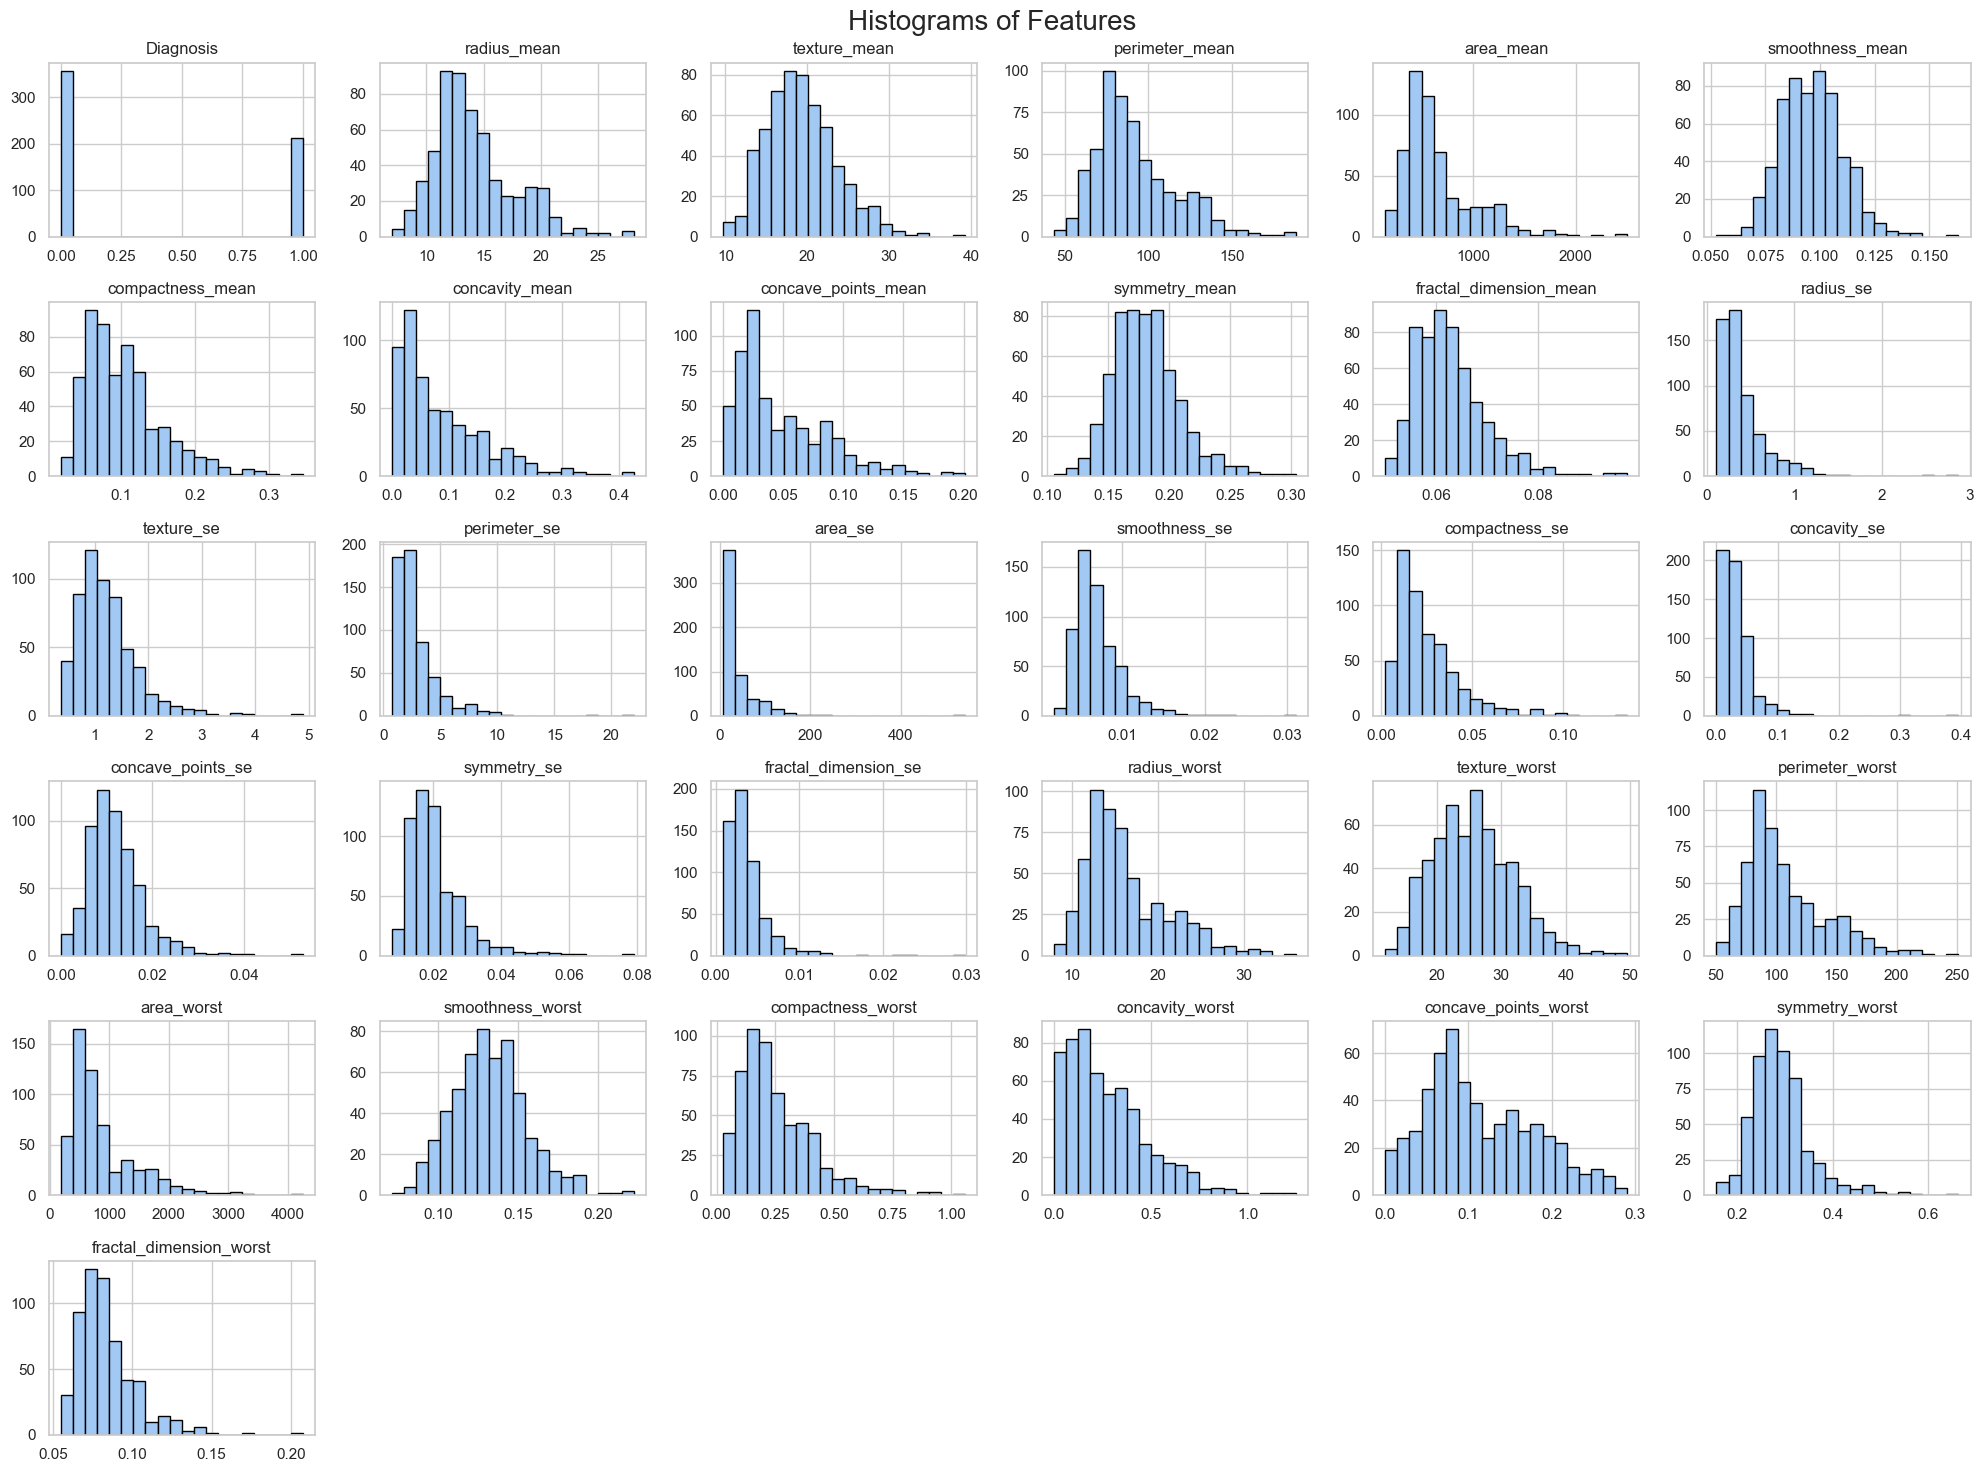

In [29]:
sns.set(style="whitegrid", palette="pastel")
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=20)
plt.tight_layout()
plt.show()

The plot shows how tumor features vary by diagnosis, with malignant cases generally having higher values, helping distinguish them from benign ones.

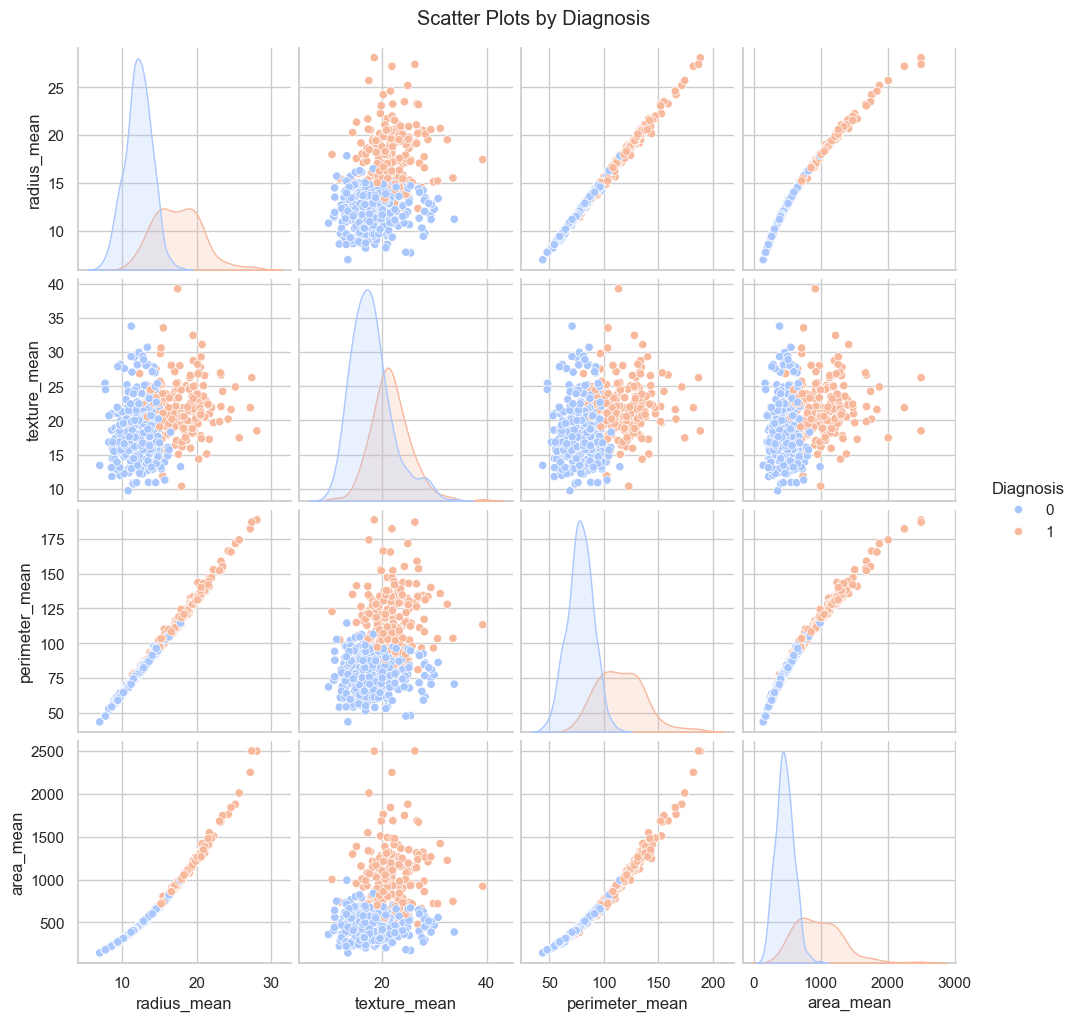

In [30]:
sample_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'Diagnosis']
sns.pairplot(df[sample_features], hue='Diagnosis', palette='coolwarm')
plt.suptitle("Scatter Plots by Diagnosis", y=1.02)
plt.show()

## Get the Correlation between all features

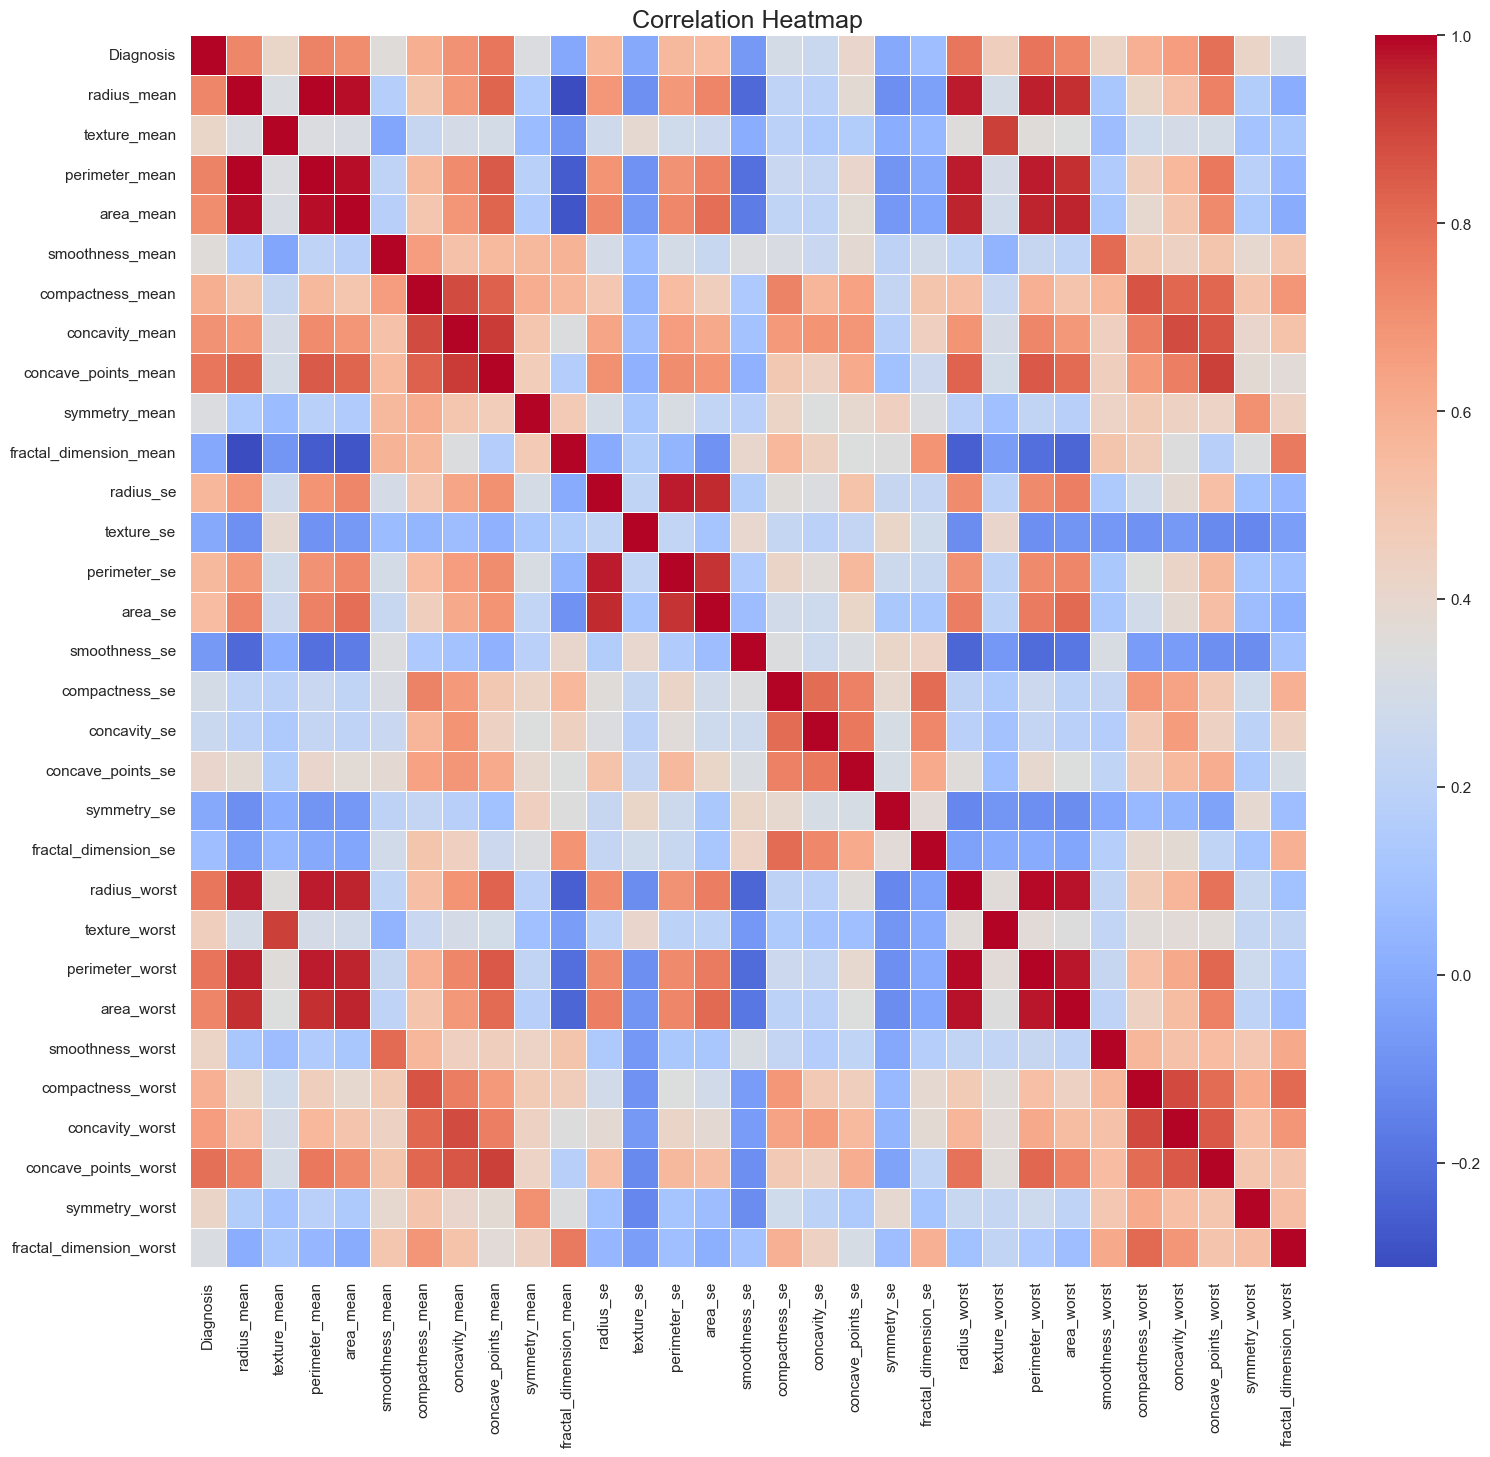

In [31]:
plt.figure(figsize=(18, 16))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

### Preprocessing:
- Select features (X) and target (y = Diagnosis).
- Apply StandardScaler for feature normalization.
- Split the dataset using an 80/20 train/test ratio.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (455, 30)
Testing set shape: (114, 30)


### Logistic Regression
Use logistic regression to classify whether a tumor is benign or malignant.

In [33]:
df= IHateThisProject("D:\\ML2\\wdbc.csv")

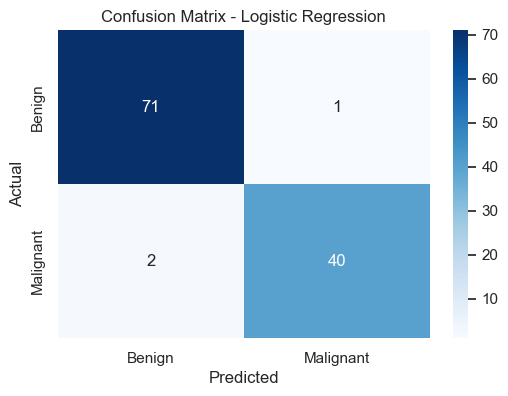

Confusion Matrix:
 [[71  1]
 [ 2 40]]
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1 Score: 0.9639


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

# Features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print metrics
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


In [35]:
df= IHateThisProject("D:\\ML2\\wdbc.csv")

We split the dataset into 60% for training, 20% for validation, and 20% for testing

In [37]:
df = IHateThisProject1("D:\\ML2\\wdbc.csv")
# Features and target
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

# Split data: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 of 0.8 = 0.2

# Scale features

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# KNN: Test different K values

In [39]:
from sklearn.neighbors import KNeighborsClassifier


k_values = range(1, 21)
val_accuracies = []
best_k = 0
best_val_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    val_pred = knn.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_k = k

# Train final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
test_pred = knn_final.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)

In [40]:
# Cross-validation (5-fold) on training set
from sklearn.model_selection import cross_val_score


knn_cv = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)
cv_mean_accuracy = np.mean(cv_scores)
cv_std_accuracy = np.std(cv_scores)

# Print results
print(f"Best K: {best_k}")
print(f"Validation Accuracy with Best K: {best_val_accuracy:.4f}")
print(f"Test Accuracy with Best K: {test_accuracy:.4f}")
print(f"5-Fold Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")
print(f"Cross-Validation Std Dev: {cv_std_accuracy:.4f}")

# Comparison and discussion
print("\nPerformance Comparison:")
print(f"- Validation Set Accuracy: {best_val_accuracy:.4f}")
print(f"- Test Set Accuracy: {test_accuracy:.4f}")
print(f"- Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")
print("\nDiscussion:")
print("Cross-validation provides a more robust performance estimate because it uses multiple splits of the training data, reducing the risk of overfitting to a single validation set. The cross-validation mean accuracy is typically more stable and generalizable than a single validation or test set score. In this case, the cross-validation accuracy is close to the validation and test accuracies, suggesting consistent model performance across different data splits. The low standard deviation in cross-validation scores indicates reliable performance across folds.")

Best K: 3
Validation Accuracy with Best K: 0.9825
Test Accuracy with Best K: 0.9474
5-Fold Cross-Validation Mean Accuracy: 0.9589
Cross-Validation Std Dev: 0.0286

Performance Comparison:
- Validation Set Accuracy: 0.9825
- Test Set Accuracy: 0.9474
- Cross-Validation Mean Accuracy: 0.9589

Discussion:
Cross-validation provides a more robust performance estimate because it uses multiple splits of the training data, reducing the risk of overfitting to a single validation set. The cross-validation mean accuracy is typically more stable and generalizable than a single validation or test set score. In this case, the cross-validation accuracy is close to the validation and test accuracies, suggesting consistent model performance across different data splits. The low standard deviation in cross-validation scores indicates reliable performance across folds.


In [41]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Split data into Train (60%), Validation (20%), Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [43]:
# Find the best value of K using validation set
best_k = 1
best_acc = 0

In [44]:
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_val, y_val)
    if acc > best_acc:
        best_acc = acc
        best_k = k

In [45]:
# Train final model with best K
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='M')  # Set positive class explicitly
rec = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

In [47]:
print(f"Best K: {best_k}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Best K: 2
Confusion Matrix:
 [[71  1]
 [11 31]]
Accuracy: 0.8947
Precision: 0.9688
Recall: 0.7381
F1 Score: 0.8378


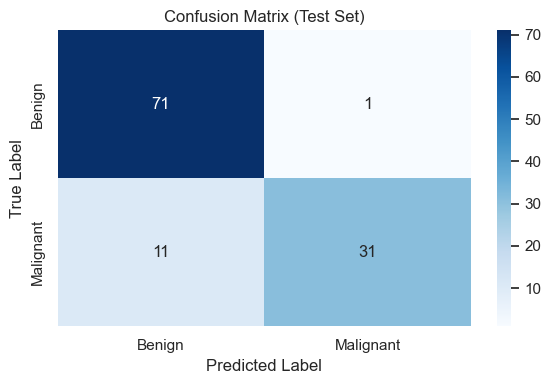

In [48]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

In [49]:
df = IHateThisProject1("D:\\ML2\\wdbc.csv")

In [50]:
# Split data
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (398, 31)
Validation set size: (85, 31)
Test set size: (86, 31)


In [52]:
# Convert string labels to numeric values (1 for 'M', 0 for 'B')
y_train_numeric = y_train.map({'M': 1, 'B': 0}).values
y_val_numeric = y_val.map({'M': 1, 'B': 0}).values
y_test_numeric = y_test.map({'M': 1, 'B': 0}).values

# Convert to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train_scaled)
y_train_torch = torch.FloatTensor(y_train_numeric).reshape(-1, 1)
X_val_torch = torch.FloatTensor(X_val_scaled)
y_val_torch = torch.FloatTensor(y_val_numeric).reshape(-1, 1)
X_test_torch = torch.FloatTensor(X_test_scaled)
y_test_torch = torch.FloatTensor(y_test_numeric).reshape(-1, 1)

In [53]:
# SVM Implementation
svm_results = {}
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42, probability=True)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    svm_results[kernel] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report,
        'model': svm
    }

# Print SVM results
for kernel, results in svm_results.items():
    print(f"\nSVM with {kernel} kernel:")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(results['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(results['classification_report']).transpose())


SVM with linear kernel:
Accuracy: 0.9767
Confusion Matrix:
[[58  2]
 [ 0 26]]
Classification Report:
              precision    recall  f1-score    support
B              1.000000  0.966667  0.983051  60.000000
M              0.928571  1.000000  0.962963  26.000000
accuracy       0.976744  0.976744  0.976744   0.976744
macro avg      0.964286  0.983333  0.973007  86.000000
weighted avg   0.978405  0.976744  0.976978  86.000000

SVM with poly kernel:
Accuracy: 0.9070
Confusion Matrix:
[[60  0]
 [ 8 18]]
Classification Report:
              precision    recall  f1-score    support
B              0.882353  1.000000  0.937500  60.000000
M              1.000000  0.692308  0.818182  26.000000
accuracy       0.906977  0.906977  0.906977   0.906977
macro avg      0.941176  0.846154  0.877841  86.000000
weighted avg   0.917921  0.906977  0.901427  86.000000

SVM with rbf kernel:
Accuracy: 0.9884
Confusion Matrix:
[[59  1]
 [ 0 26]]
Classification Report:
              precision    recall  f1-s

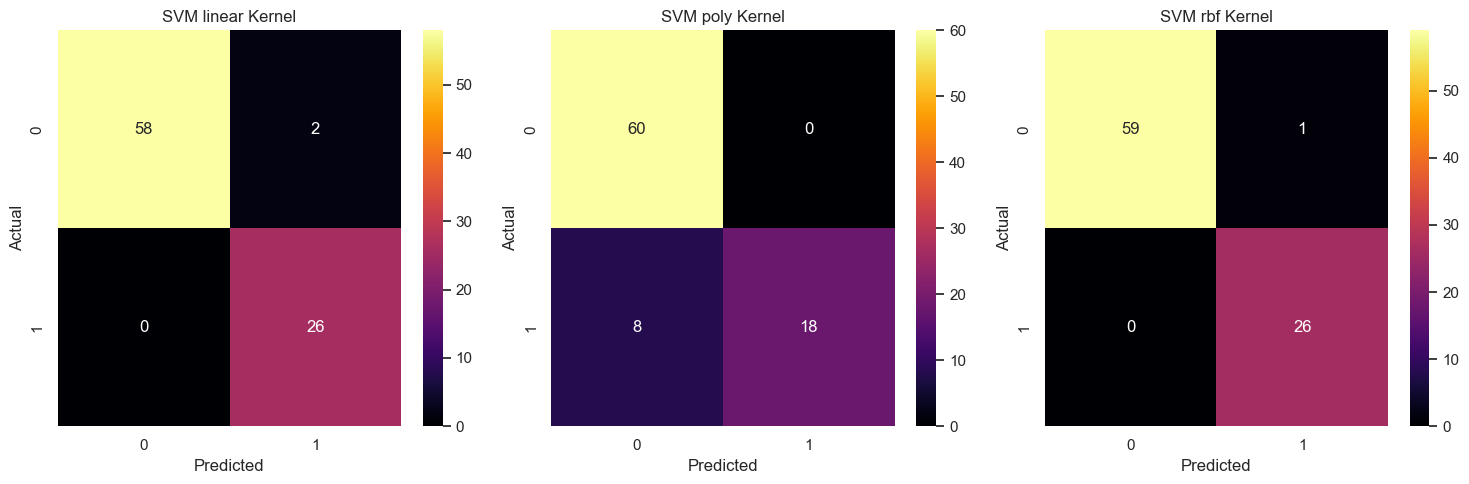

In [54]:
# Visualize SVM confusion matrices with a custom colormap
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (kernel, results) in enumerate(svm_results.items()):
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='inferno', ax=axes[i])
    axes[i].set_title(f'SVM {kernel} Kernel')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.savefig('svm_confusion_matrices.png')
plt.show()

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, activation='relu'):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.activation = nn.ReLU() if activation == 'relu' else nn.Sigmoid()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.output_activation(self.layer3(x))
        return x

In [56]:
nn_results = {}
activations = ['relu', 'sigmoid']

for activation in activations:
    # Initialize model
    model = NeuralNetwork(input_size=X_train.shape[1], activation=activation)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    epochs = 100
    batch_size = 32
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        for i in range(0, len(X_train_torch), batch_size):
            batch_X = X_train_torch[i:i+batch_size]
            batch_y = y_train_torch[i:i+batch_size]
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        
        # Compute training and validation loss
        model.eval()
        with torch.no_grad():
            train_outputs = model(X_train_torch)
            train_loss = criterion(train_outputs, y_train_torch)
            val_outputs = model(X_val_torch)
            val_loss = criterion(val_outputs, y_val_torch)
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    # Predict on test set
    model.eval()
    with torch.no_grad():
        try:
            y_pred_proba = model(X_test_torch).cpu().numpy()
        except ImportError as e:
            raise ImportError("NumPy is required for tensor conversion. Please install it with: pip install numpy")
        y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate metrics
    # Convert y_test to numeric values to match y_pred
    y_test_numeric = y_test.map({'B': 0, 'M': 1}).values

    accuracy = accuracy_score(y_test_numeric, y_pred)
    cm = confusion_matrix(y_test_numeric, y_pred)
    report = classification_report(y_test_numeric, y_pred, output_dict=True)

    # Store results
    nn_results[activation] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'model': model,
        'y_pred_proba': y_pred_proba
    }


Neural Network with relu activation:
Accuracy: 0.9884
Confusion Matrix:
[[59  1]
 [ 0 26]]
Classification Report:
              precision    recall  f1-score    support
0              1.000000  0.983333  0.991597  60.000000
1              0.962963  1.000000  0.981132  26.000000
accuracy       0.988372  0.988372  0.988372   0.988372
macro avg      0.981481  0.991667  0.986364  86.000000
weighted avg   0.988803  0.988372  0.988433  86.000000


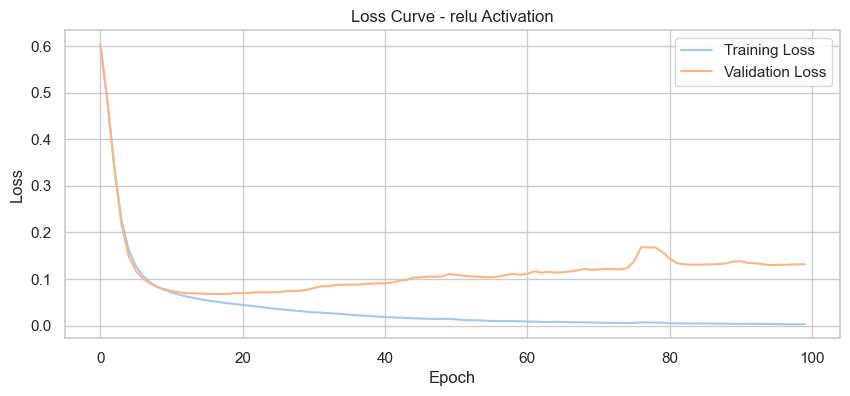


Neural Network with sigmoid activation:
Accuracy: 1.0000
Confusion Matrix:
[[60  0]
 [ 0 26]]
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     60.0
1                   1.0     1.0       1.0     26.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     86.0
weighted avg        1.0     1.0       1.0     86.0


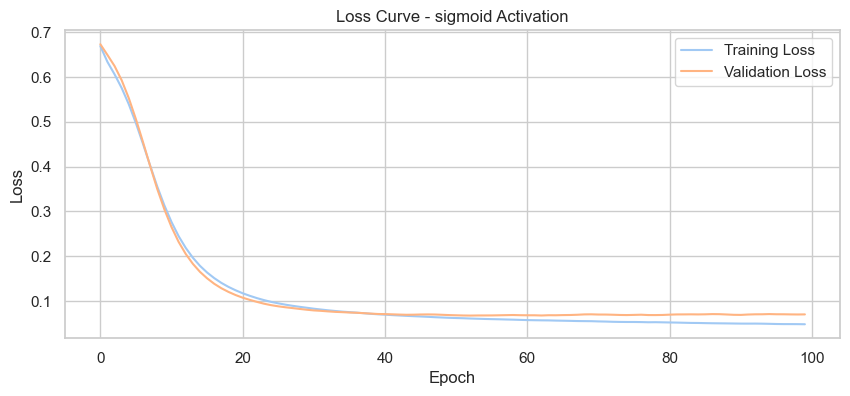

In [57]:
# Print NN results and plot loss curves
for activation, results in nn_results.items():
    print(f"\nNeural Network with {activation} activation:")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(results['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(results['classification_report']).transpose())
    
    plt.figure(figsize=(10, 4))
    plt.plot(results['train_losses'], label='Training Loss')
    plt.plot(results['val_losses'], label='Validation Loss')
    plt.title(f'Loss Curve - {activation} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'nn_loss_curve_{activation}.png')
    plt.show()

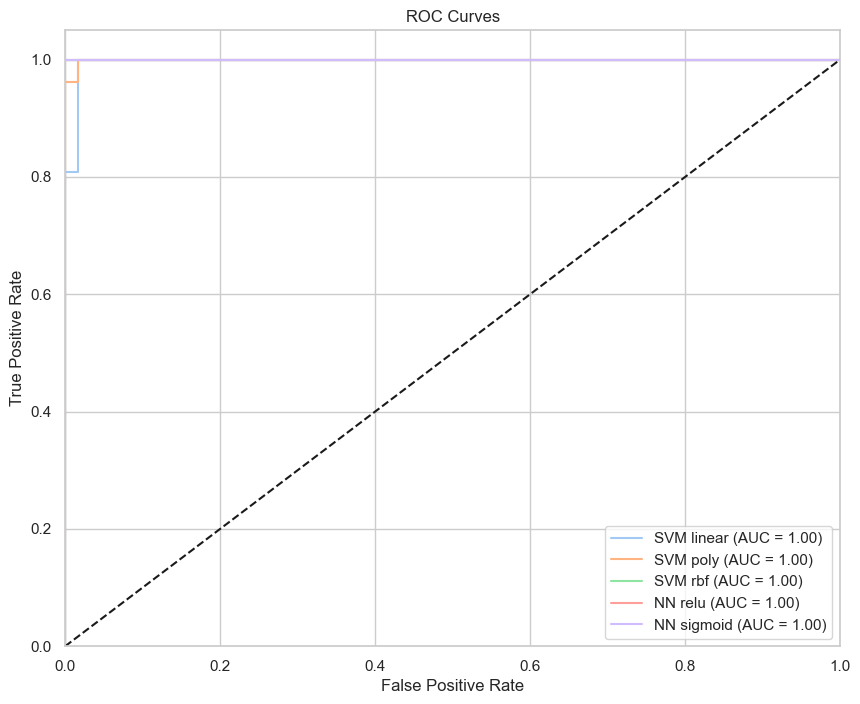

In [58]:
# Model Comparison
plt.figure(figsize=(10, 8))
# Convert y_test to numeric values (0 for 'B', 1 for 'M')
y_test_numeric = y_test.map({'B': 0, 'M': 1}).values

for kernel, results in svm_results.items():
    y_pred_proba = results['model'].predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'SVM {kernel} (AUC = {roc_auc:.2f})')

for activation, results in nn_results.items():
    fpr, tpr, _ = roc_curve(y_test_numeric, results['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'NN {activation} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.savefig('roc_curves.png')
plt.show()
